In [ ]:
# Итоговая работа
# =====================

# Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

# Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

# Принципы вы знаете, чек-лист аналогичен лабораторной работе.

# Чек-лист:
# 1. Загрузите датасет taxi.csv.
# 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
# 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
# 4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
# 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
# 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
# 7. Разделите выборку на обучаемую и тестовую.
# 8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

# Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import numpy as np
import datetime as dt

%matplotlib inline

# 1. Загрузите датасет taxi.csv.

In [6]:
dataset = pd.read_csv('taxi.csv')
dataset.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

# 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
# 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.


In [7]:
dataset.describe().T

count           mean            std   min  \
offer_gk                100000.0  566218.928650  325935.980081   4.0   
weekday_key             100000.0       3.159860       2.054222   0.0   
hour_key                100000.0      13.827790       7.306496   0.0   
driver_gk               100000.0    3446.376360    2038.738677  14.0   
order_gk                100000.0  460867.012910  266064.989530  18.0   
driver_latitude         100000.0      55.700824       2.135903  -1.0   
driver_longitude        100000.0      37.492292       1.454640  -1.0   
origin_order_latitude   100000.0      55.772440       0.665985  -1.0   
origin_order_longitude  100000.0      37.541637       0.467758  -1.0   
distance_km             100000.0      18.393518      41.129296  -1.0   
duration_min            100000.0      23.134841      33.890105  -1.0   
driver_response         100000.0       0.492480       0.499946   0.0   

                                  25%            50%            75%  \
offer_gk                285555.250000  565671.500000  848719.750000   
weekday_key                  1.000000       3.000000       5.000000   
hour_key                     8.000000      16.000000      20.000000   
driver_gk                 1421.000000    3506.500000    5242.000000   
order_gk                229178.500000  462420.000000  690894.000000   
driver_latitude             55.708651      55.772904      55.960667   
driver_longitude            37.413497      37.533664      37.624113   
origin_order_latitude       55.708032      55.772561      55.962000   
origin_order_longitude      37.407117      37.532537      37.624358   
distance_km                 -1.000000      10.411500      30.665250   
duration_min                -1.000000      19.700000      37.867000   
driver_response              0.000000       0.000000       1.000000   

                                 max  
offer_gk                1.130355e+06  
weekday_key             6.000000e+00  
hour_key                2.300000e+01  
driver_gk               6.806000e+03  
order_gk                9.203440e+05  
driver_latitude         5.617410e+01  
driver_longitude        3.828055e+01  
origin_order_latitude   5.631112e+01  
origin_order_longitude  3.824361e+01  
distance_km             5.234283e+03  
duration_min            3.958283e+03  
driver_response         1.000000e+00

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

-В датасете содержится 100 000 строк.  
-Представлены как количественные, так и категориальные переменные (offer_class_group, ride_type_desc).  
-Явно пропущенные значения ни по одному признаку не определены. Посмотрим descibe признаков более подробно:  
* минимальные значения равно 0 в признаках weekday_key, hour_key, driver_response.  
Очевидно, что для driver_response 0 - нормальное значение "отказа". Для показатеоей дни недели и часа этот показатель также имеет логическое значение. 
* есть странные значения -1 в казалось бы нормальных признаках

In [9]:
# dataset.weekday_key.value_counts()

In [10]:
# dataset.hour_key.value_counts()

In [11]:
# отфильтруем странные записи с -1 значениями. Начнем чистить с показателя distance_km. 
# Предположим, что широта или долгота заказа могли по какой-то причине не определиться, со вренем поездки сложнее. 
# Но отсутствие дистанции поездки позволяет определить эту заявку как ложную, выброс, аномалию? 
print("Количество значений -1 для признака distance_km: \t", len(dataset[dataset['distance_km'] == -1]))
print("Количество значений -1 для признака duration_min: \t", len(dataset[dataset['duration_min'] == -1]))
print("Количество значений -1 для признака driver_latitude: \t", len(dataset[dataset['driver_latitude'] == -1]))
print("Количество значений -1 для признака driver_longitude: \t", len(dataset[dataset['driver_longitude'] == -1]))
print("Количество значений -1 для признака origin_order_latitude: \t", len(dataset[dataset['origin_order_latitude'] == -1]))
print("Количество значений -1 для признака origin_order_longitude: \t", len(dataset[dataset['origin_order_longitude'] == -1]))

Количество значений -1 для признака distance_km: 	 26207
Количество значений -1 для признака duration_min: 	 26207
Количество значений -1 для признака driver_latitude: 	 140
Количество значений -1 для признака driver_longitude: 	 140
Количество значений -1 для признака origin_order_latitude: 	 13
Количество значений -1 для признака origin_order_longitude: 	 13


In [12]:
equation = dataset[dataset['distance_km'] == -1] == dataset[dataset['duration_min'] == -1]
equation.offer_gk.value_counts()

True    26207
Name: offer_gk, dtype: int64

В датасете 26 207 записей, без указания дистанции и времени поездки. Очевидно, что это не просто какие-то сбои, а системно отсутствующие данные. Возможно, кто-то предусмотрительно "заменил" аномилии или выбросы на -1. Примем как есть.

Таким образом явных пропусков в данных не обнаружено, дополнительных манипуляций не требуется. 

# 4. Оцените зависимости переменных между собой.   
Используйте корреляции.   
Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.


In [13]:
# sns.pairplot(dataset)

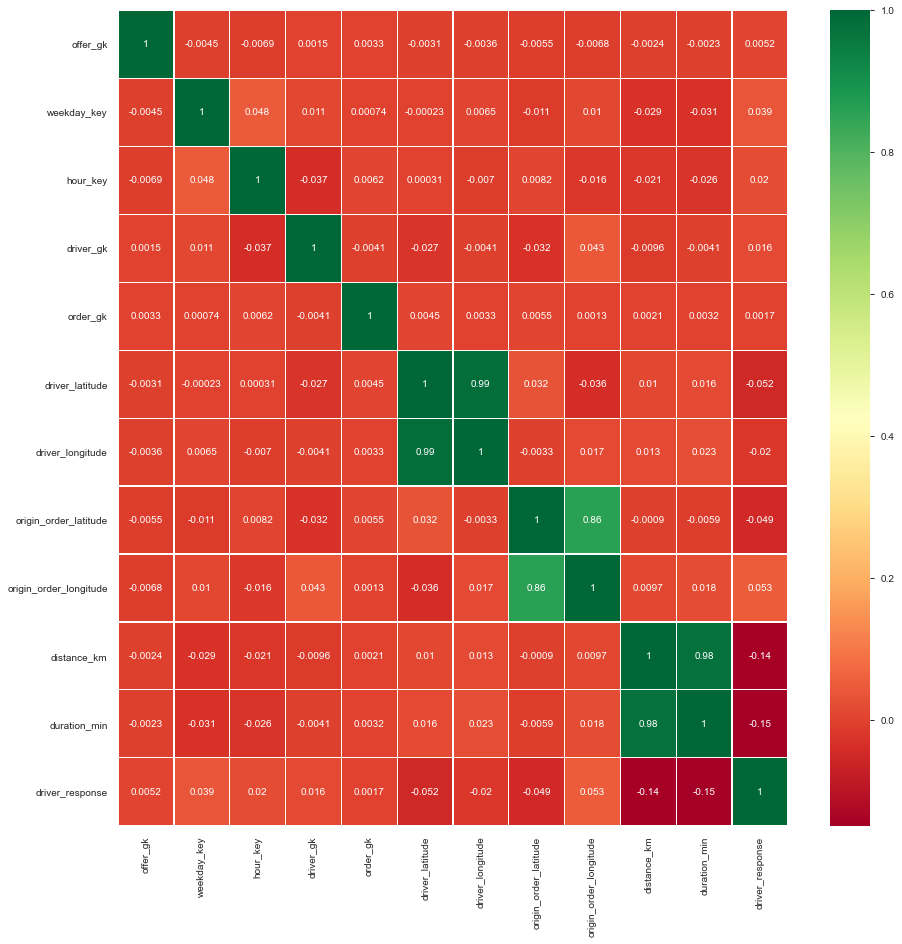

In [14]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [15]:
dataset.profile_report()

- много нулевых значений в признаках ключа часа и дня недели (но это ок). 
- очень высоко скоррелированы признаки 
* driver_longitude и driver_latitude
* driver_order_longitude и driver_oder_latitude
* duration_min и distance_km
- большое процент уникальных значений признака в: offer_gk (100%!), order_gk (81.4%), показателях широты и долготы. 

# 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).


Произведем обработку значений внутри категорий признаков, перед построением модели произведем lable-encoding.  

Есть два категориальных признака (offer_class_group, ride_type_desc), рассмотрим подробнее. 

# offer_class_group

In [16]:
dataset.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

In [17]:
# проверим на адекватность группу значений, попадающих в поле Test
dataset[dataset['offer_class_group'] == 'Test']

# вероятно, что ни одна из этих поездок не состоялась. Скорее всего в бою необходимости предсказывать 
# значения на тестовых заявках не будет. Поэтому исключим "тестовые" записи из датасета. 

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
12092    849177            5        20       3763     83260        55.820917   
31035   1122239            3        23       6290    493264        55.959273   
43940    897797            5        20        591     83260        55.821477   
54657    954625            1        18        172    203179        55.823113   
65028   1039723            1        15       1916    357476        55.881810   
82848    990065            2        14       3371    325838        55.775556   
95758    159224            5        17       1126    392645        55.761183   
97311   1060685            3        23       6302    493264        55.964894   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
12092         37.650258              55.827038               37.660981   
31035         37.415073              55.962322               37.407117   
43940         37.611275              55.827038               37.660981   
54657         37.508883              55.829178               37.513307   
65028         37.654255              55.872580               37.668403   
82848         37.582864              55.773730               37.591352   
95758         37.657616              55.757251               37.659064   
97311         37.413532              55.962322               37.407117   

       distance_km  duration_min offer_class_group ride_type_desc  \
12092         -1.0          -1.0              Test            SMB   
31035         -1.0          -1.0              Test            SMB   
43940         -1.0          -1.0              Test            SMB   
54657         -1.0          -1.0              Test            SMB   
65028         -1.0          -1.0              Test            SMB   
82848         -1.0          -1.0              Test            SMB   
95758         -1.0          -1.0              Test            SMB   
97311         -1.0          -1.0              Test            SMB   

       driver_response  
12092                0  
31035                0  
43940                1  
54657                1  
65028                1  
82848                1  
95758                1  
97311                1

In [18]:
dataset_norm = dataset[dataset['offer_class_group'] != 'Test']

In [19]:
dataset_norm.offer_class_group.value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Name: offer_class_group, dtype: int64

In [20]:
# львиную долю поездку составляют поездки эконом-классом и стандарт, тем не менее среди низкочастотных значений 
# логически можно выделить две разнородные группы - ВИП-перевозки+дети и доставка+крупногабаритные перевозки.
# сгруппируем эти значения

In [21]:
def group_offer_class(self):
    if (self == 'Premium') or (self == 'Kids') or (self == 'VIP') or (self == 'VIP+'):
        return 'vip'
    elif (self == 'Delivery') or (self == 'XL'):
        return 'delivery'
    else:
        return self

In [22]:
dataset_norm.loc[:,'offer_class_group'] = dataset_norm.offer_class_group.apply(group_offer_class)

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
dataset_norm.offer_class_group.value_counts()

Economy     48335
Standard    47288
vip          2615
delivery     1754
Name: offer_class_group, dtype: int64

# ride_type_desc

In [24]:
dataset_norm.ride_type_desc.value_counts()

private      91207
business      8533
affiliate      224
SMB             28
Name: ride_type_desc, dtype: int64

In [25]:
dataset_norm.ride_type_desc =   np.where(dataset_norm['ride_type_desc'] == 'private', dataset_norm['ride_type_desc'], 
                                np.where(dataset_norm['ride_type_desc'] == 'business', dataset_norm['ride_type_desc'],
                                         'other'))

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
# сами по себе категориальные значения выглядят нормально. Сгруппируем низкочастотные значения в группу "другие"
dataset_norm.ride_type_desc.value_counts()

private     91207
business     8533
other         252
Name: ride_type_desc, dtype: int64

# 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

Так как рассмтариваемая задача относится скорее к задаче класификации, а для её решения будут применены алгоритмы RandomForest и XGBoost, то применять нормирование к данным не будем.  

In [27]:
# признак offer_gk содержит только уникальные записи и по всей видимости является уникальным
# ID предложения. С точки зрения логики и "проклятья размерности" этот признак не нужен в прогнозе. 

dataset.offer_gk.value_counts()

534523    1
513801    1
139921    1
539282    1
799379    1
         ..
927150    1
798127    1
578992    1
318897    1
393216    1
Name: offer_gk, Length: 100000, dtype: int64

In [28]:
dataset_norm = dataset.drop('offer_gk', axis=1)

In [29]:
# скорее всего признак duration_min посчитан исходя опираясь на указанную дистанцию поездки.
# эту гипотезу подтверждает высокая корреляция между ними. Уберем этот признак. 
dataset_norm = dataset_norm.drop('duration_min', axis=1)

In [30]:
# признак order_gk не всегда уникален. Псмотреть. Может сделать признак "повторной поездки"?

In [31]:
dataset_norm.head()

weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0            5        20       6080    174182        55.818842   
1            5        14       6080    358774        55.805342   
2            6        14       6080    866260        55.813978   
3            2         6       6080    163522        55.745922   
4            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km offer_class_group ride_type_desc  driver_response  
0       -1.000           Economy        private                0  
1       18.802          Standard        private                1  
2        6.747           Economy        private                0  
3       -1.000           Economy        private                1  
4       12.383           Economy        private                1

In [32]:
# разделить тест-трейн
# обучить модель 1
# предсказать модель 1
# оценть модель 1
# обучить модель 2
# предсказать модель 2
# оценть модель 2

# 7. Разделите выборку на обучаемую и тестовую.

In [35]:
Y = dataset_norm.driver_response
input_x_digit = dataset_norm.drop(['driver_response','offer_class_group','ride_type_desc'], axis=1)
input_x_cat = dataset_norm[['ride_type_desc','offer_class_group']]

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
OH_X = input_x_cat.apply(LabelEncoder().fit_transform)

In [37]:
input_x = pd.concat([input_x_digit, OH_X], axis=1)

In [38]:
from sklearn.model_selection import train_test_split

X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.2)

# 8. Обучите модель.  
Хорошие результаты дают классификаторы RandomForest и XGBoost

 RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_22,y_train_22)

RandomForestClassifier()

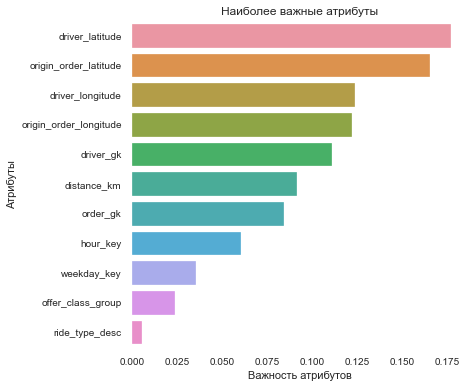

In [41]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train_22, y_train_22)


y_pred = estimator.predict(X_test_22)

print("Original .mean \t", dataset.driver_response.mean())
print("R2: \t", r2_score(y_test_22, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test_22, y_pred)))
print("MAE: \t", mean_absolute_error(y_test_22, y_pred))

Original .mean 	 0.49248
R2: 	 0.07902253040763052
RMSE: 	 0.4798250698700035
MAE: 	 0.46603069264978575


XGBoost

In [49]:
import xgboost as xgb

In [55]:
Y

0        0
1        1
2        0
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: driver_response, Length: 100000, dtype: int64

In [56]:
data = pd.concat([input_x, Y], axis=1)
data.head()

weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0            5        20       6080    174182        55.818842   
1            5        14       6080    358774        55.805342   
2            6        14       6080    866260        55.813978   
3            2         6       6080    163522        55.745922   
4            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  ride_type_desc  offer_class_group  driver_response  
0       -1.000               3                  1                0  
1       18.802               3                  4                1  
2        6.747               3                  1                0  
3       -1.000               3                  1                1  
4       12.383               3                  1                1

In [57]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [58]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [62]:
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [63]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [64]:
print("Original .mean \t", dataset.driver_response.mean())
print("R2: \t", r2_score(y_test, preds))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, preds)))
print("MAE: \t", mean_absolute_error(y_test, preds))

Original .mean 	 0.49248
R2: 	 0.1854357512648852
RMSE: 	 0.45122056690713913
MAE: 	 0.2036


# Напишите в markdown свои наблюдения по полученным результатам. 